In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.values[:, 1:]
Y = df.values[:, 0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [5]:
split = int(0.8 * X.shape[0])
print(split)

33600


In [8]:
x_train = X[:split, :]
y_train = Y[:split]

x_test = X[split:, :]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [9]:
def dist(x1, x2) :
    return np.sqrt(sum((x1-x2)**2))

In [10]:
def knn(X, Y, queryPoint, k = 5) :
    vals = []
    m = X.shape[0] # Total points
    for i in range(m) :
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    # Nearest/First k points
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    # print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [13]:
# Each point(sample has 784 dimensions instead of 2
# But our dist function is generalised(vectorised))

In [17]:
def drawImg(x) :
    plt.imshow(x.reshape(28, 28), cmap = 'gray')
    plt.axis("off")
    plt.show()

In [21]:
query_point = x_test[1]

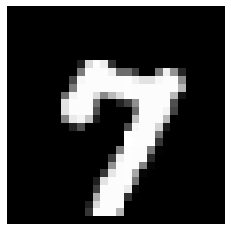

In [22]:
drawImg(query_point)

In [23]:
print(knn(X, Y, query_point, 10))

7.0


In [24]:
query_point = x_test[5]

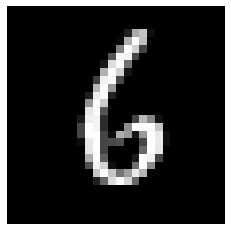

In [25]:
drawImg(query_point)

In [26]:
print(knn(X, Y, query_point, 10))

6.0


# Calculating Accuracy of KNN

In [ ]:
total_cases = 100
correct_pred = 0

for i in range(100) :
    if knn(X, Y, x_test[i], 15) == y_test[i] :
        correct_pred += 1

accuracy = (correct_pred / total_cases) * 100

In [ ]:
print(accuracy)